## Data loading

### Subtask:
Load the data into a DataFrame.

**Reasoning**:
Load the data from the `simplelinearregression.csv` file into a pandas DataFrame and display the first few rows to inspect the data.

In [13]:
import pandas as pd

try:
    df = pd.read_csv('simplelinearregression.csv')
    display(df.head())
except FileNotFoundError:
    print("The file 'simplelinearregression.csv' was not found.")
    df = None

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


## Data Preparation

### Subtask:
Prepare the data for linear regression.

**Reasoning**:
Separate the features (independent variable) and the target variable (dependent variable) from the DataFrame. In this case, I will assume the first column is the feature and the second column is the target variable.

In [14]:
if df is not None:
    X = df.iloc[:, :-1].values  # Features (all columns except the last one)
    y = df.iloc[:, -1].values   # Target variable (the last column)
    print("Data prepared successfully.")
else:
    print("DataFrame is not loaded. Cannot prepare data.")

Data prepared successfully.


## Model Training

### Subtask:
Train a linear regression model.

**Reasoning**:
Import the `LinearRegression` model from `sklearn.linear_model` and train the model using the prepared feature and target variables.

In [15]:
if df is not None:
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()
    model.fit(X, y)
    print("Model trained successfully.")
else:
    print("DataFrame is not loaded. Cannot train model.")

Model trained successfully.


## Visualization

### Subtask:
Visualize the data and the regression line.

**Reasoning**:
Create a scatter plot of the original data points and then plot the linear regression line using the trained model to visualize the relationship between the feature and target variable and how well the model fits the data.

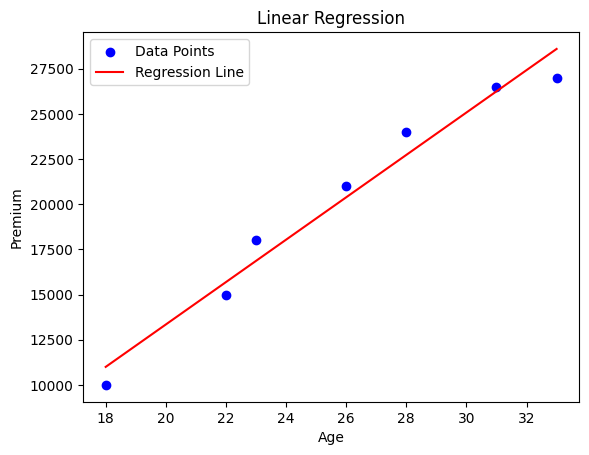

In [16]:
if df is not None:
    import matplotlib.pyplot as plt

    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, model.predict(X), color='red', label='Regression Line')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.title('Linear Regression')
    plt.legend()
    plt.show()
else:
    print("DataFrame is not loaded. Cannot visualize.")

## Error Calculation

### Subtask:
Calculate the error of the model.

**Reasoning**:
Calculate the Mean Squared Error (MSE) to evaluate the performance of the linear regression model. MSE measures the average of the squared differences between the actual and predicted values.

In [17]:
if df is not None:
    from sklearn.metrics import mean_squared_error

    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
else:
    print("DataFrame is not loaded. Cannot calculate error.")

Mean Squared Error (MSE): 1052348.336594913


# Task
Create a multiple linear regression model using the data from the "CarPrice_Assignment.csv" file, including data preparation, model training, evaluation, and visualization.

## Data loading

### Subtask:
Load the data from the "CarPrice_Assignment.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data from the 'CarPrice_Assignment.csv' file into a pandas DataFrame and display the first few rows to inspect the data, as instructed.



In [21]:
import pandas as pd

try:
    car_data = pd.read_csv('CarPrice_Assignment.csv')
    display(car_data.head())
except FileNotFoundError:
    print("The file 'CarPrice_Assignment.csv' was not found.")
    car_data = None

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data inspection

### Subtask:
Inspect the data to understand its structure, identify potential issues like missing values or categorical variables, and get an overview of the columns.


**Reasoning**:
Inspect the data structure, summary statistics, and missing values to understand the dataset.



In [22]:
# Display data types
print("Data Types:")
car_data.info()

# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(car_data.describe())

# Check for missing values
print("\nMissing Values:")
print(car_data.isnull().sum())

# Display unique values and counts for selected categorical columns
print("\nUnique values and counts for selected categorical columns:")
for col in ['fueltype', 'aspiration', 'doornumber']:
    print(f"\nColumn: {col}")
    print(car_data[col].value_counts())

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null  

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000



Missing Values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Unique values and counts for selected categorical columns:

Column: fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64

Column: aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64

Column: doornumber
doornumber
four    115
two      90
Name: count, dtype: int64


## Data preparation

### Subtask:
Prepare the data for multiple linear regression.


**Reasoning**:
Identify the categorical columns and apply one-hot encoding to them, then separate features and the target variable.



In [23]:
# Identify categorical columns (object type)
categorical_cols = car_data.select_dtypes(include=['object']).columns

# Apply one-hot encoding
car_data_encoded = pd.get_dummies(car_data, columns=categorical_cols, drop_first=True)

# Separate features (X) and target variable (y)
X = car_data_encoded.drop('price', axis=1)
y = car_data_encoded['price']

print("Data prepared for multiple linear regression:")
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Data prepared for multiple linear regression:
Shape of features (X): (205, 190)
Shape of target variable (y): (205,)


## Model training

### Subtask:
Train a multiple linear regression model using the prepared data.


**Reasoning**:
Train a multiple linear regression model using the prepared features and target variable.



In [24]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
multiple_regression_model = LinearRegression()

# Fit the model to the data
multiple_regression_model.fit(X, y)

print("Multiple linear regression model trained successfully.")

Multiple linear regression model trained successfully.


## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate regression metrics.


**Reasoning**:
Calculate the MSE and R-squared to evaluate the model's performance.



In [25]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = multiple_regression_model.predict(X)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 153338.25152688453
R-squared (R2): 0.9975856211766684


## Feature selection (optional)

### Subtask:
Explore methods to select the most relevant features to improve the model's performance and interpretability.


**Reasoning**:
Use SelectKBest with f_regression to select the top 15 features, create a new dataframe with selected features and the target variable, train a new linear regression model on the reduced dataset, evaluate the new model, and print the selected feature names.



In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select top N features (e.g., N=15)
k = 15
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_features_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_features_indices]

# Create a new DataFrame with selected features and the target variable
X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)
df_selected = pd.concat([X_selected_df, y], axis=1)

# Train a new multiple linear regression model with selected features
model_selected = LinearRegression()
model_selected.fit(X_selected, y)

# Evaluate the new model
y_pred_selected = model_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = r2_score(y, y_pred_selected)

print(f"Selected features (top {k}):")
print(selected_feature_names)
print("\nModel performance with selected features:")
print(f"Mean Squared Error (MSE): {mse_selected}")
print(f"R-squared (R2): {r2_selected}")

Selected features (top 15):
Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd',
       'drivewheel_rwd', 'cylindernumber_four', 'cylindernumber_six',
       'fuelsystem_2bbl', 'fuelsystem_mpfi'],
      dtype='object')

Model performance with selected features:
Mean Squared Error (MSE): 9338844.288545545
R-squared (R2): 0.8529557520048888
